In [92]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
import seaborn as sns
import re
import math
sns.set_style("whitegrid")
sns.set_palette("tab10")


In [93]:
# import file part

In [94]:
df=pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [95]:
#Check null value

In [96]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [97]:
#cleaning null value 

In [98]:
df = df.dropna()

In [99]:
#check again

In [100]:
df.isnull().sum()
df

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [101]:
#Reset index 

In [102]:
df = df.reset_index(drop=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5327,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5328,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5329,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5330,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [103]:
#Exploratory Data

In [104]:
df['release_year'] = pd.to_datetime(df['release_year'],format='%Y')
df['date_added'] = pd.to_datetime(df['date_added'])
indeks = df[np.isnan(df['date_added'])].index
df.loc[indeks, 'date_added'] = df.loc[indeks, 'release_year']
df['release_year'] = df['release_year'].dt.year

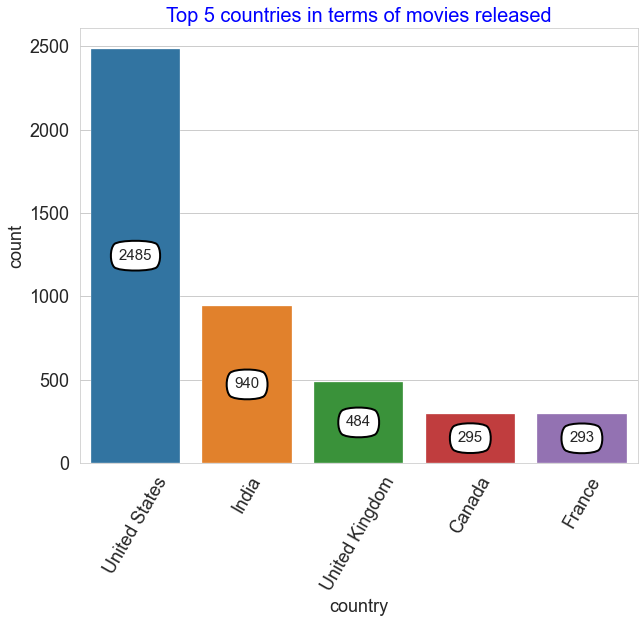

In [105]:
title = 'Top 5 countries in terms of movies released'
countries = {}
for country in df.country.dropna():
    for sub_country in str(country).split(', '):
        if sub_country not in countries:
            countries[sub_country] = 1
        else: countries[sub_country] += 1
df_countries = pd.DataFrame(list(countries.items()),columns = ['country','count']).sort_values(by = ['count'])
_ = plt.subplots(figsize = (10,8))
_ = plt.xticks(rotation = 60)
_ = plt.title(title, color='blue', fontsize=20)
plots = sns.barplot(data = df_countries.tail()[::-1],x= 'country', y='count')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)


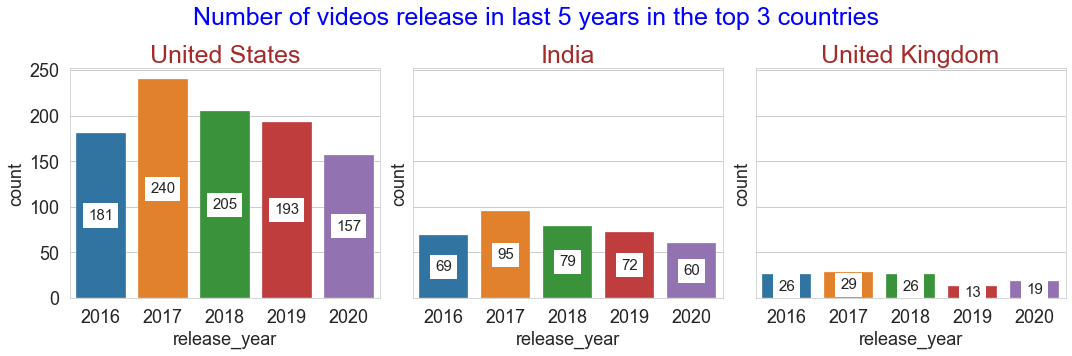

In [106]:
title = 'Number of videos release in last 5 years in the top 3 countries'
fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5),sharey=True)
_ = fig.suptitle(title, fontsize = 25, color = 'blue')
i = 0
for country in df_countries.tail(3).country.values[::-1]:
    df_country = df.loc[df.country == country].loc[(df.release_year>2015) & (df.release_year<=2020)]
    plots = sns.countplot(data = df_country,x= 'release_year', ax = ax[i])
    _ = ax[i].set_title(country,color='brown', fontsize=25)
    for bar in plots.patches:
        _ = plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()/2), ha='center', va='center',
                       size=15, xytext=(0, 0),bbox=dict(fc="w", ec="white", lw=2),
                       textcoords='offset points')
    i += 1
fig.tight_layout()
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

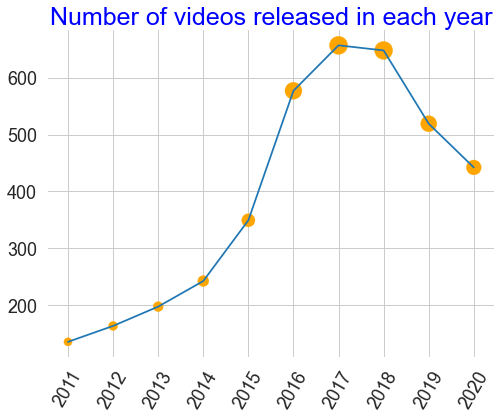

In [107]:
release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)

title = 'Number of videos released in each year'
_ = plt.figure(figsize=(8,6))
_ = plt.plot(release[-11:-1])
_ = plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='orange');
_ = plt.box(on=None);
_ = plt.xticks(rotation = 60)
_ = plt.xticks(release[-11:-1].index);
_ = plt.title(title, color='blue', fontsize=25);
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

In [108]:
#Number of video group by rating

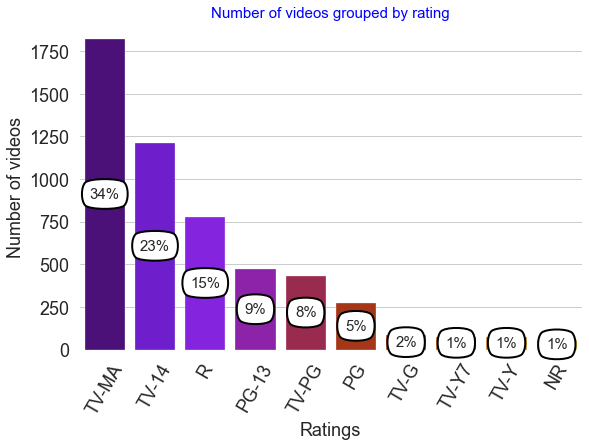

In [109]:
rating = df['rating'].value_counts()
#rating = rating.sort_values()

title = 'Number of videos grouped by rating'
_ = plt.figure(figsize=(9,6));
_ = plt.title(title, color='blue', fontsize=15)
plots = sns.barplot(y=rating.values[:10], x=rating.index[:10], palette='gnuplot',orient='v');
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height()/rating.sum()*100, '.0f')+'%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.xlabel('Ratings')
_ = plt.xticks(rotation = 60)
_ = plt.ylabel('Number of videos')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

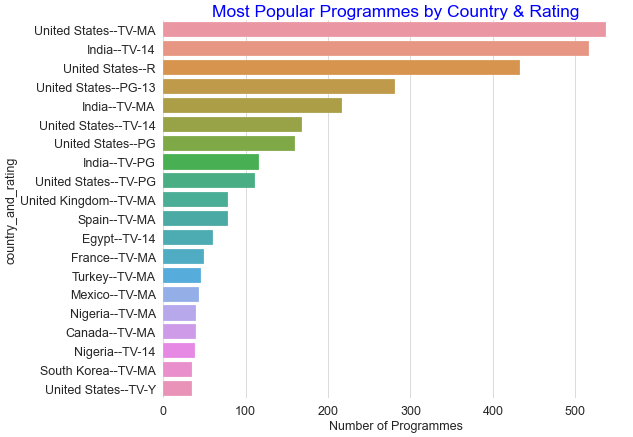

In [110]:
country_rating = df.groupby(['country', 'rating']).count().sort_values('show_id', ascending=False).reset_index()
country_rating['country_and_rating'] = country_rating[['country','rating']].apply(axis=1,func = lambda x : str(x.country)+'--'+str(x.rating))
country_rating.set_index(keys = 'country_and_rating', inplace = True)

title = 'Most Popular Programmes by Country & Rating'
_ = plt.figure(figsize=(12,10), dpi = 50)
plots = sns.barplot(y=country_rating.index[:20], x = country_rating['show_id'][:20]);
_ = plt.box(on=None)
_ = plt.title(title, fontsize=25, color='blue')
_ = plt.xlabel('Number of Programmes');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

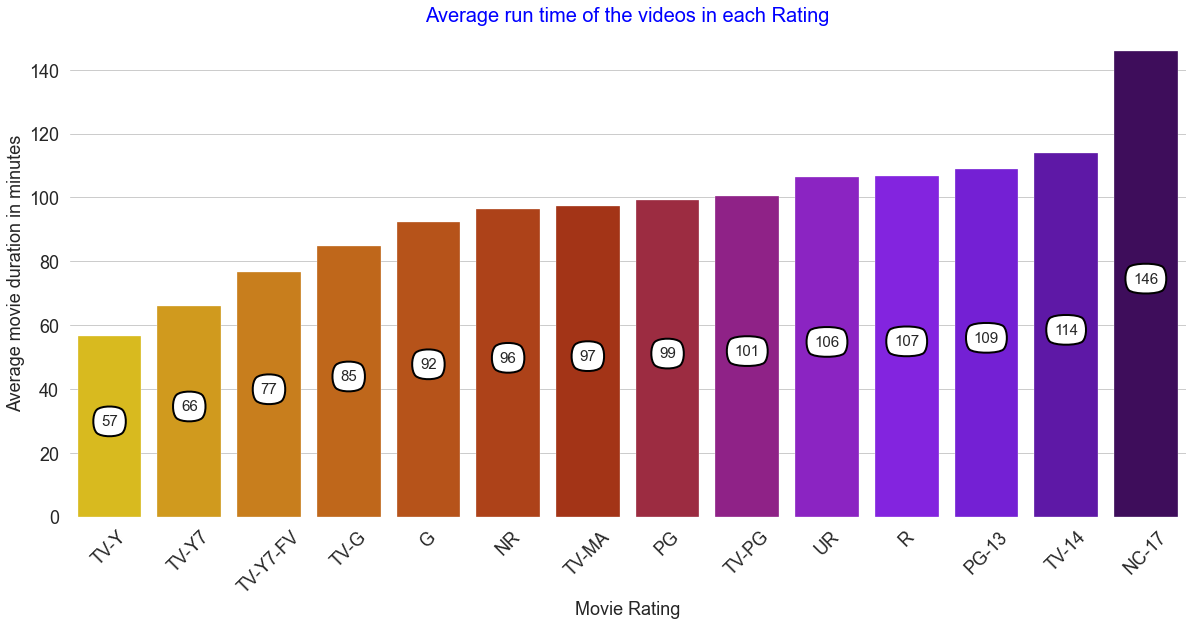

In [111]:
movie = df.copy()
movie = movie[movie['type'] == 'Movie']

movie['minute'] = [int(re.findall('\d{1,3}', w)[0]) for w in movie.duration.ravel()]

duration_rating = movie.groupby(['rating']).mean().sort_values('minute')
title = 'Average run time of the videos in each Rating'
_ = plt.figure(figsize=(20,9))
plots = sns.barplot(x=duration_rating.index, y=duration_rating.minute.values, palette='gnuplot_r')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.title(title, fontsize = 20, color = 'blue')
_ = plt.xlabel('Movie Rating')
_ = plt.xticks(rotation = 45)
_ = plt.ylabel('Average movie duration in minutes')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

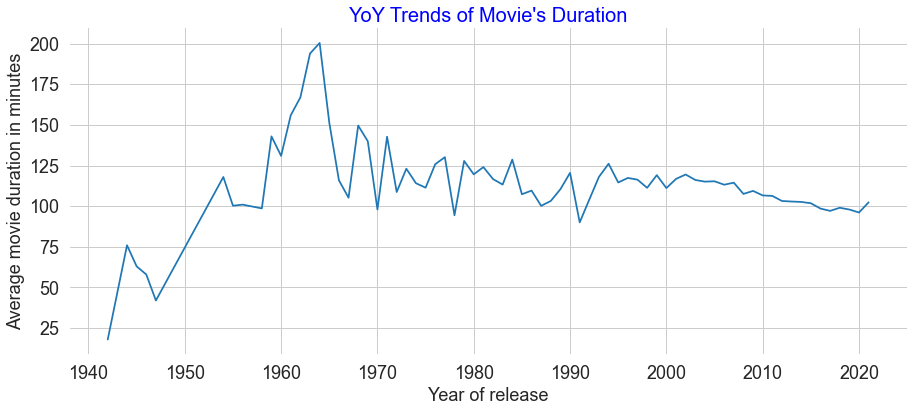

In [112]:
duration_year = movie.groupby(['release_year']).mean().sort_values('minute')
duration_year = duration_year.sort_index()

title = "YoY Trends of Movie's Duration"
_ = plt.figure(figsize=(15,6))
_ = sns.lineplot(x=duration_year.index, y=duration_year.minute.values)
_ = plt.box(on=None)
_ = plt.ylabel('Average movie duration in minutes');
_ = plt.xlabel('Year of release');
_ = plt.title(title, fontsize=20, color='blue');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

Text(0.5, 0, 'Length of Total Movies Released in Minutes')

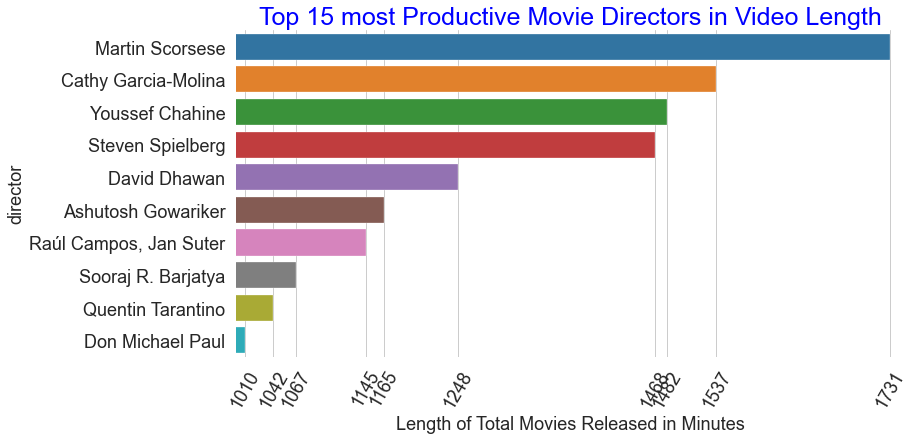

In [113]:
director_minute = movie.groupby('director').sum().sort_values('minute', ascending=False)
title = 'Top 15 most Productive Movie Directors in Video Length'
_ = plt.figure(figsize=(12,6))
_ = sns.barplot(y=director_minute.index[:10], x=director_minute.minute[:10]);
_ = plt.title(title, color='blue', fontsize=25)
_ = plt.xticks(director_minute.minute[:10],rotation = 60)
_ = plt.xlim(min(director_minute.minute[:10])/10*9.9,max(director_minute.minute[:10])/10*10.1)
_ = plt.box(on=None)
plt.xlabel('Length of Total Movies Released in Minutes');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

Text(0.5, 0, 'Count of Total Movies Released')

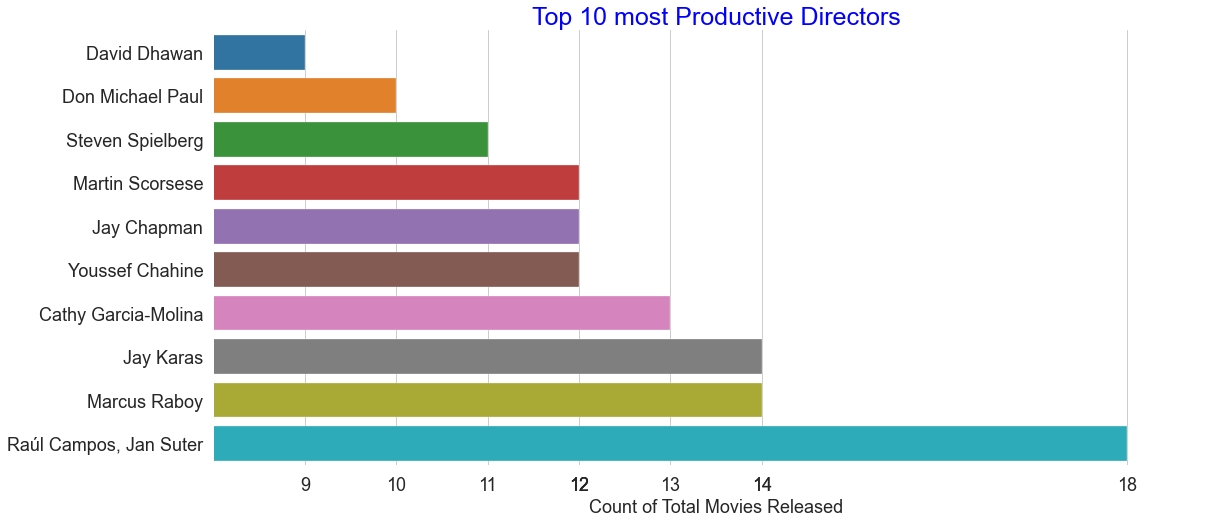

In [114]:
title = 'Top 10 most Productive Directors'
_ = plt.figure(figsize=(18,8))
_ = sns.barplot(y=movie.director.value_counts()[:10].sort_values().index, x=movie.director.value_counts()[:10].sort_values().values);
_ = plt.title(title, color='blue', fontsize=25)
_ = plt.box(on=None)
_ = plt.xticks(movie.director.value_counts()[:10].sort_values().values);
_ = plt.xlim(min(movie.director.value_counts()[:10])-1,max(movie.director.value_counts()[:10])+1)
plt.xlabel('Count of Total Movies Released');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

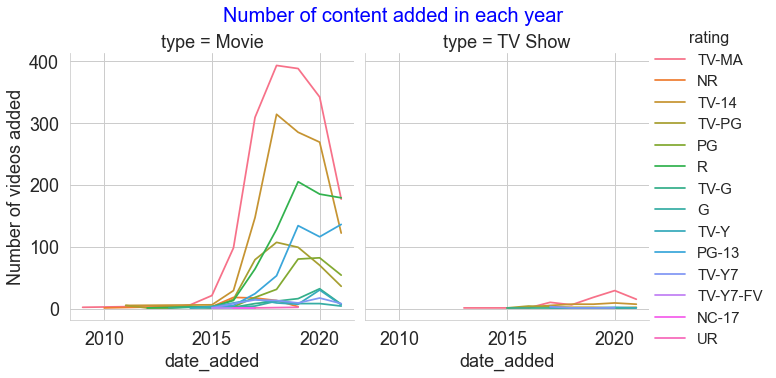

In [115]:
df_data_added = df[df.date_added >'2008-01-01'].groupby([df.date_added.dt.year,df.type,df.rating]).count().show_id.reset_index()
title = 'Number of content added in each year'
g = sns.relplot(data = df_data_added, x = 'date_added', y = 'show_id', col = 'type', hue ='rating',kind = 'line', markers = True,aspect = 0.9, height = 5)
_ = g.axes[0,0].set_ylabel('Number of videos added')
_ = g.fig.suptitle(title, color = 'blue',fontsize = 20)
_ = g.fig.subplots_adjust(top=0.85)
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

In [ ]:
v